In [2]:
import numpy as np
import pandas as pd
import math
import random
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import normal
from numpy.random import multivariate_normal

# DGP

Basic form

Time varying process to generate parameters

$$vec(A_t) - \mu = \rho (vec(A_{t - 1}) - \mu ) + \eta_t$$

$$ vec(A_0) = \mu$$

$$\eta_t \sim \mathcal{N}(0, \Sigma_{\eta_t})$$

$$ 0 < \rho < 1$$

In [3]:
#specify initial parameters
mu = np.array([[0.4], [0], [0], [0.4]])
rho = 0.5
mean = [0, 0, 0, 0]
cov = [[1, 0.2, 0.2, 0.2], [0.2, 1, 0.2, 0.2], [0.2, 0.2, 1, 0.2], [0.2, 0.2, 0.2, 1]]
eta = np.random.multivariate_normal(mean, cov)

In [9]:
#generate time varying parameters in vec form

def vecTVP(t):
    if t == 0:
        return mu
    else:
        phi = rho*(vecTVP(t - 1) - mu) + eta.reshape(4,1)
        return phi 

In [10]:
#TVP in matrix form
Mu = 0.4*np.identity(2)

def matrixTVP(t):
    if t == 0:
        return Mu
    else:
        phi = rho*(matrixTVP(t - 1) - Mu) + eta.reshape((2,2))
        return phi

Generating time series observations

$$y_t = A_t y_{t-1} + \epsilon_t$$

$$\epsilon_t \sim \mathcal{N}(0, \Sigma_{\epsilon_t})$$

$$y_0 = [0, 0]'$$

In [11]:
#generate observations

meaneps = [0,0]
sigma = [[1, 0.2], [0.2, 1]]
epsilon = np.random.multivariate_normal(meaneps, sigma)

def y(t):
    if t == 0:
        return np.zeros((2, 1))
    else:
        y_t = matrixTVP(t) @ y(t - 1) + epsilon.reshape(2,1)
        return y_t

In [12]:
y(1)

array([[-1.08416843],
       [-0.9728627 ]])

In [13]:
y(2)

array([[-0.57591634],
       [ 1.6340659 ]])

In [14]:
y(3)

array([[ 0.57130061],
       [-9.03874362]])

In [15]:
y(5)

array([[  38.39940121],
       [-231.79307866]])

In [16]:
y(10)

array([[-183073.07843553],
       [1077294.40315204]])

In [17]:
y(20)

array([[-4.23196589e+12],
       [ 2.49029981e+13]])

In [18]:
y(50)

array([[-5.24394343e+34],
       [ 3.08579787e+35]])

In [19]:
#plot generated time series
x = []
y1 = []
y2 = []

for t in range(10):
    x.append(t)
    y1.append(y(t)[0])
    y2.append(y(t)[1])

In [20]:
min(y1)

array([-6181.81799797])

In [21]:
max(y1)

array([33622.35283244])

In [22]:
min(y2)

array([-197858.06179649])

In [23]:
max(y2)

array([36376.91364033])

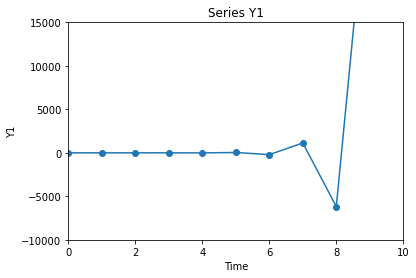

In [24]:
#series y1

fig1, ax1 = plt.subplots()
ax1.plot(x, y1, marker = 'o')
ax1.set_ylim([-10000, 15000])
ax1.set_xlim([0, 10])
ax1.set_xlabel("Time")
ax1.set_ylabel("Y1")
ax1.set_title("Series Y1")
plt.show()

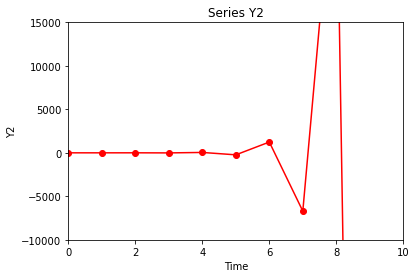

In [25]:
#series y2

fig2, ax2 = plt.subplots()
ax2.plot(x, y2, marker = 'o', color = 'red')
ax2.set_ylim([-10000, 15000])
ax2.set_xlim([0, 10])
ax2.set_xlabel("Time")
ax2.set_ylabel("Y2")
ax2.set_title("Series Y2")
plt.show()

# ProPar update

$$ vec(A_{t|t}') = [X_t'\Sigma^{-1}X_t + P_t]^{-1} [P_t' vec (A_{t||t-1}') + X_t' \Sigma ^{-1} y_t] $$

Where $$X_t = I_k \otimes x_t'$$


In this case $$x_t = y_{t-1}$$.


In [26]:
P = 2*np.identity(4) #penalty matrix as multiple of identity matrix

In [27]:
def updateMu(t):
    if t == 0:
        return np.reshape(Mu, (4,1), 'C')
    else:
        X = np.kron(np.identity(2), np.transpose(y(t-1)))
        vecApred = np.random.standard_normal((4,1)) #prediction normal
        vecAupd = np.linalg.inv(np.transpose(X) @ np.linalg.inv(sigma) @ X + P) @ (np.transpose(P) @ vecApred 
                                                                            + np.transpose(X) @ np.linalg.inv(sigma) @ y(t))
        return vecAupd

In [28]:
updateMu(1)

array([[ 0.52360078],
       [-1.18538522],
       [-0.60210207],
       [ 1.38017128]])

In [29]:
updateMu(2)

array([[ 1.94556666],
       [-1.93772578],
       [-1.30086584],
       [ 0.23769624]])

In [30]:
updateMu(1) - np.reshape(Mu, (4,1), 'C')

array([[ 0.27478121],
       [-0.73440342],
       [ 0.46640655],
       [-0.8295781 ]])

In [78]:
#plot generated time series
trueparams1 = []
updates1 = []
trueparams2 = []
updates2 = []
trueparams3 = []
updates3 = []
trueparams4 = []
updates4 = []
X = []

for t in range(50):
    trueparams1.append(vecTVP(t)[0])
    updates1.append(updateMu(t)[0])
    
    trueparams2.append(vecTVP(t)[1])
    updates2.append(updateMu(t)[1])
    
    trueparams3.append(vecTVP(t)[2])
    updates3.append(updateMu(t)[2])
    
    trueparams4.append(vecTVP(t)[3])
    updates4.append(updateMu(t)[3])
    
    X.append(t)

In [81]:
trueparams1

[array([0.4]),
 array([-0.48961405]),
 array([-0.93442107]),
 array([-1.15682459]),
 array([-1.26802634]),
 array([-1.32362722]),
 array([-1.35142766]),
 array([-1.36532788]),
 array([-1.37227799]),
 array([-1.37575304]),
 array([-1.37749057]),
 array([-1.37835934]),
 array([-1.37879372]),
 array([-1.37901091]),
 array([-1.3791195]),
 array([-1.3791738]),
 array([-1.37920095]),
 array([-1.37921453]),
 array([-1.37922131]),
 array([-1.37922471]),
 array([-1.3792264]),
 array([-1.37922725]),
 array([-1.37922768]),
 array([-1.37922789]),
 array([-1.37922799]),
 array([-1.37922805]),
 array([-1.37922807]),
 array([-1.37922809]),
 array([-1.37922809]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.3792281]),
 array([-1.379

In [82]:
trueparams2

[array([0.]),
 array([0.34593284]),
 array([0.51889926]),
 array([0.60538247]),
 array([0.64862408]),
 array([0.67024488]),
 array([0.68105528]),
 array([0.68646048]),
 array([0.68916308]),
 array([0.69051438]),
 array([0.69119003]),
 array([0.69152786]),
 array([0.69169677]),
 array([0.69178123]),
 array([0.69182345]),
 array([0.69184457]),
 array([0.69185513]),
 array([0.6918604]),
 array([0.69186304]),
 array([0.69186436]),
 array([0.69186502]),
 array([0.69186535]),
 array([0.69186552]),
 array([0.6918656]),
 array([0.69186564]),
 array([0.69186566]),
 array([0.69186567]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568]),
 array([0.69186568])

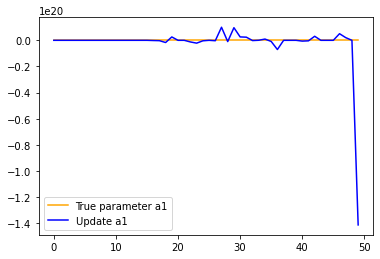

In [79]:
#Param a1
plt.plot(X, trueparams1, label = 'True parameter a1', color = 'orange')
plt.plot(X, updates1, label = 'Update a1', color = 'blue')
plt.legend()
plt.show()

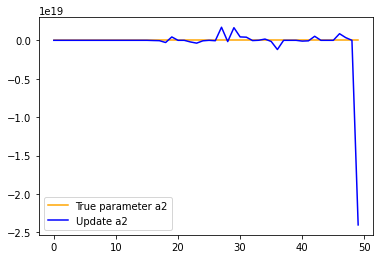

In [80]:
#Param a2
plt.plot(X, trueparams2, label = 'True parameter a2', color = 'orange')
plt.plot(X, updates2, label = 'Update a2', color = 'blue')
plt.legend()
plt.show()

In [56]:
def yProPar(t):
    if t == 0:
        return np.zeros((2, 1))
    else:
        y_t = np.reshape(updateMu(t), (2,2), 'F') @ yProPar(t - 1) + epsilon.reshape(2,1)
        return y_t

In [69]:
MSE1 = []
MSE2 = []

for t in range(20):
    MSE1.append(y(t)[0] - yProPar(t)[0])
    MSE2.append(y(t)[1] - yProPar(t)[1])

In [71]:
np.mean(MSE1)

7.791842478932435e+80

In [72]:
np.mean(MSE2)

2.8452687179392373e+79

In [76]:
ts = []
for t in range(50):
    ts.append(y(t))
    
ts

[array([[0.],
        [0.]]),
 array([[-1.08416843],
        [-0.9728627 ]]),
 array([[-0.57591634],
        [ 1.6340659 ]]),
 array([[ 0.57130061],
        [-9.03874362]]),
 array([[-7.67133939],
        [43.75949277]]),
 array([[  38.39940121],
        [-231.79307866]]),
 array([[-210.84208183],
        [1239.90369432]]),
 array([[ 1137.92929214],
        [-6702.5913383 ]]),
 array([[-6181.81799797],
        [36376.91364033]]),
 array([[  33622.35283244],
        [-197858.06179649]]),
 array([[-183073.07843553],
        [1077294.40315204]]),
 array([[  997318.49353708],
        [-5868728.06458881]]),
 array([[-5434477.80615568],
        [31979180.52106991]]),
 array([[ 2.96167998e+07],
        [-1.74280032e+08]]),
 array([[-1.61416122e+08],
        [ 9.49852974e+08]]),
 array([[ 8.79771506e+08],
        [-5.17701436e+09]]),
 array([[-4.79512562e+09],
        [ 2.82169108e+10]]),
 array([[ 2.61356703e+10],
        [-1.53795320e+11]]),
 array([[-1.42452171e+11],
        [ 8.38259627e+1

In [77]:
#GAS update

import statsmodels.tsa.api as smt

# create a dynamic conditional score model
model = smt.DynamicFactor(ts, 2, factor_order=1, error_cov_type='diagonal')

# fit the model to the data
results = model.fit(disp=True)

# make predictions using the fitted model
predictions = results.predict(start=len(ts), end=len(ts)+10)

ValueError: Number of factors must be less than the number of endogenous variables.

In [73]:
from statsmodels.tsa.vector_ar.var_model import VAR

# fit the VAR model
model = VAR(ts)
model_fit = model.fit()

# make predictions
predictions = model_fit.forecast(model_fit.y, steps=10)

ValueError: x contains one or more constant columns. Column(s) 0, 1 are constant. Adding a constant with trend='c' is not allowed.